In [3]:
!pip install matplotlib

In [4]:
!pip install scikit-learn

In [5]:
!pip install pandas

In [6]:
!pip install numpy

In [7]:
import matplotlib.pylab as plt
from sklearn import linear_model
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/주택도시보증공사_전국신규민간아파트분양가격동향_20230630.csv", encoding='cp949')
data.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [10]:
Seoul_data = data[data['지역명'] == '서울']
Seoul_data.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [11]:
Seoul_data_60 = Seoul_data[Seoul_data['규모구분'] == '전용면적 60제곱미터이하']
Seoul_data_60.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
1,서울,전용면적 60제곱미터이하,2015,10,5652
86,서울,전용면적 60제곱미터이하,2015,11,6320
171,서울,전용면적 60제곱미터이하,2015,12,6321
256,서울,전용면적 60제곱미터이하,2016,1,6427
341,서울,전용면적 60제곱미터이하,2016,2,6438


In [12]:
X_data = (Seoul_data_60['연도'].values - 2015) * 12 + Seoul_data_60['월'].values.astype('int64')
X_data, X_data.shape

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102]),
 (93,))

In [13]:
y_data = Seoul_data_60['분양가격(제곱미터)'].values.astype('int64')
y_data, y_data.shape

(array([ 5652,  6320,  6321,  6427,  6438,  6550,  6618,  6638,  6562,
         6611,  6592,  6565,  6661,  6695,  6713,  6662,  6668,  6570,
         6570,  6592,  6460,  6510,  6371,  6767,  6815,  6931,  7005,
         6898,  6907,  7193,  7196,  7318,  7232,  7360,  7117,  6631,
         6806,  7017,  7398,  7400,  7654,  7750,  7894,  8104,  8281,
         8231,  8223,  8205,  8230,  8196,  8115,  8330,  8193,  8533,
         8415,  8432,  8572,  8274,  8258,  8291,  8247,  8436,  8691,
         8691,  8657,  8678,  8654,  8776,  8950,  9481,  9724,  9724,
        10181, 10553, 10553,  9963, 10322, 10056, 10268,  8901,  8901,
         8901,  8656,  8656,  8656,  9207,  9184,  9463,  9425,  9491,
         9496,  9600,  9555]),
 (93,))

In [14]:
X_data = X_data.reshape(-1, 1)
X_data.shape, y_data.shape

((93, 1), (93,))

In [15]:
y_data.min(), y_data.max()

(5652, 10553)

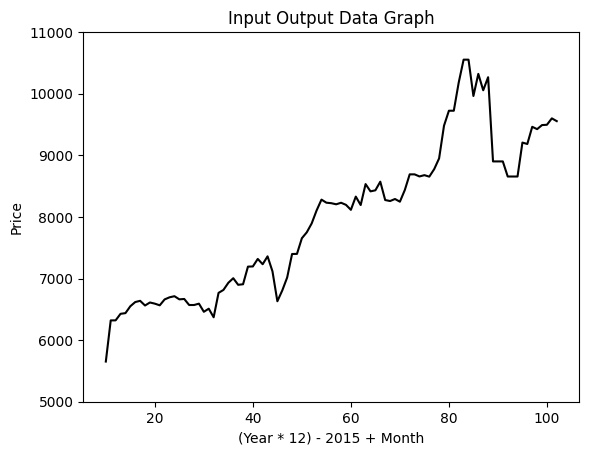

In [16]:
plt.figure()
plt.title("Input Output Data Graph")
plt.xlabel("(Year * 12) - 2015 + Month")
plt.ylabel("Price")
plt.plot(X_data, y_data, color='black')
plt.ylim(5000, 11000)
plt.show()

In [17]:
reg = linear_model.LinearRegression()
reg.fit(X_data, y_data)

LinearRegression()

In [18]:
reg.coef_, reg.intercept_

(array([42.28307123]), 5595.9652154019095)

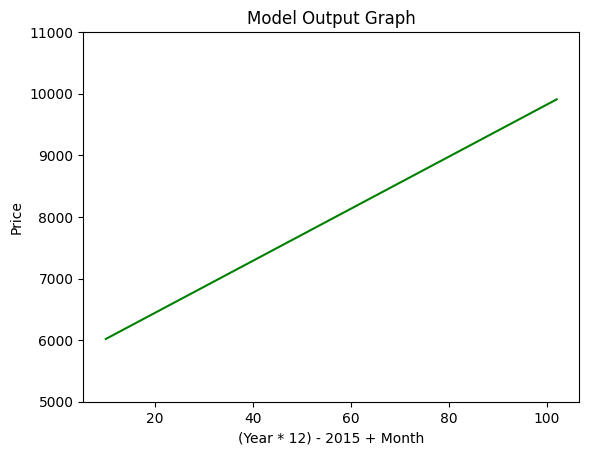

In [19]:
X = X_data
y = reg.coef_ * X_data + reg.intercept_


plt.figure()
plt.title("Model Output Graph")
plt.xlabel("(Year * 12) - 2015 + Month")
plt.ylabel("Price")
plt.plot(X, y, color='green')
plt.ylim(5000, 11000)
plt.show()

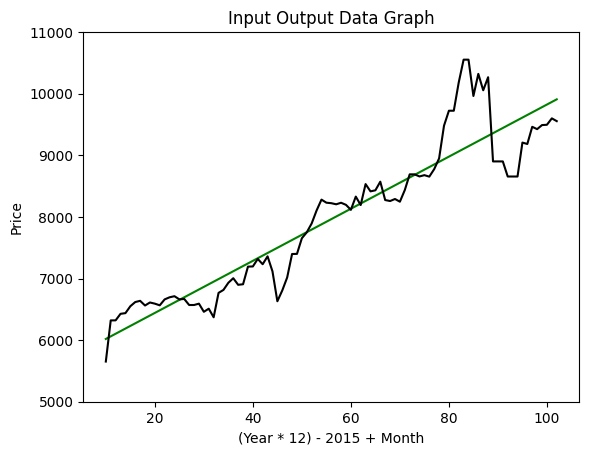

In [20]:
plt.figure()
plt.title("Input Output Data Graph")
plt.xlabel("(Year * 12) - 2015 + Month")
plt.ylabel("Price")
plt.plot(X, y, color='green')
plt.plot(X_data, y_data, color='black')
plt.ylim(5000, 11000)
plt.show()

In [21]:
year = np.array([[2023],[2024],[2025]])
month = np.array([[11],[11],[11]])
X_test = (year - 2015) * 12 + month

y_pred = reg.predict(X_test)
y_pred

array([10120.25383705, 10627.65069181, 11135.04754658])

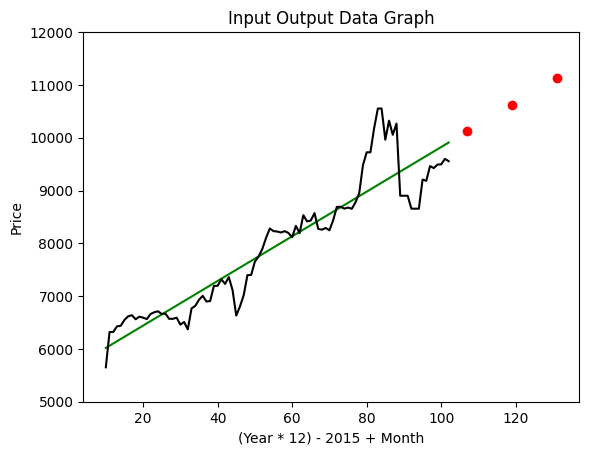

In [23]:
plt.figure()
plt.title("Input Output Data Graph")
plt.xlabel("(Year * 12) - 2015 + Month")
plt.ylabel("Price")
plt.scatter(X_test, y_pred, color='red')
plt.plot(X, y, color='green')
plt.plot(X_data, y_data, color='black')
plt.ylim(5000, 12000)
plt.show()